In [10]:
# import necessary libraries
import pandas as pd
import os
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import geopandas as gpd
import warnings
import pickle
warnings.filterwarnings('ignore')

In [11]:
with open('../pickled/fully_cleaned_data.pickle', "rb") as input_file:
    df = pickle.load(input_file) 
df

,FIPS,Rent,Year,coc_number,Houseless_rate,Sheltered_rate,Unsheltered_rate,FIPS_state,FIPS_county,State,County,TOT_POP,TOT_MALE,TOT_FEMALE,TOT_WHITE,TOT_BLACK,TOT_NATIVE,TOT_ASIAN,TOT_PACIFIC,State/County,FI Rate,Low Threshold Type,High Threshold Type,Weighted Annual Dollars,Cost Per Meal,Num_wholesale,Num_restaraunts,Num_grocery,Total_workforce,Employed,Unemployed,Unemployment_rate
0,01073,1019.995960,2014,AL-500,0.001396,0.000961,0.000435,01,073,Alabama,Jefferson County,659972.0,312491.0,347481.0,355635.0,284082.0,2029.0,10378.0,347.0,"Jefferson County, AL",0.197,SNAP,Other Nutrition Program,67209000.0,2.93,483.0,2693.0,400.0,312131.0,292505.000,19626.000,6.30
19,01117,1229.755051,2014,AL-500,0.001396,0.000961,0.000435,01,117,Alabama,Shelby County,206280.0,100304.0,105976.0,174094.0,24247.0,805.0,4403.0,101.0,"Shelby County, AL",0.105,SNAP,Other Nutrition Program,12614000.0,3.37,1.0,743.0,2706.0,107208.0,102400.000,4808.000,4.50
38,04003,1051.250000,2014,AZ-500,0.001469,0.000826,0.000643,04,003,Arizona,Cochise County,127314.0,64661.0,62653.0,112238.0,5737.0,2165.0,2757.0,510.0,"Cochise County, AZ",0.161,"SNAP, Other Nutrition Programs","SNAP, Other Nutrition Programs",10417000.0,2.81,800.0,72.0,340.0,50969.0,46682.000,4287.000,8.40
57,04013,1095.670228,2014,AZ-502,0.001318,0.001084,0.000235,04,013,Arizona,Maricopa County,4093648.0,2024659.0,2068989.0,3449404.0,235660.0,112383.0,172425.0,11190.0,"Maricopa County, AZ",0.158,"SNAP, Other Nutrition Programs","SNAP, Other Nutrition Programs",319193000.0,2.90,2389.0,16857.0,6320.0,1961997.0,1848119.000,113878.000,5.80
76,04019,928.546429,2014,AZ-501,0.002170,0.001705,0.000465,04,019,Arizona,Pima County,1004229.0,494684.0,509545.0,858334.0,41043.0,42683.0,31905.0,2266.0,"Pima County, AZ",0.154,"SNAP, Other Nutrition Programs","SNAP, Other Nutrition Programs",77182000.0,2.85,3591.0,838.0,1604.0,463126.0,435183.000,27943.000,6.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32497,72153,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Yauco Municipio, PR",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9261.5,8086.875,1174.625,12.55
32498,72153,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Yauco Municipio, PR",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9261.5,8086.875,1174.625,12.55
32499,72153,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Yauco Municipio, PR",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9261.5,8086.875,1174.625,12.55
32500,72153,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Yauco Municipio, PR",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9261.5,8086.875,1174.625,12.55


In [12]:
df.dtypes

FIPS                        object
Rent                       float64
Year                        object
coc_number                  object
Houseless_rate             float64
Sheltered_rate             float64
Unsheltered_rate           float64
FIPS_state                  object
FIPS_county                 object
State                       object
County                      object
TOT_POP                    float64
TOT_MALE                   float64
TOT_FEMALE                 float64
TOT_WHITE                  float64
TOT_BLACK                  float64
TOT_NATIVE                 float64
TOT_ASIAN                  float64
TOT_PACIFIC                float64
State/County                object
FI Rate                    float64
Low Threshold Type          object
High Threshold Type         object
Weighted Annual Dollars    float64
Cost Per Meal              float64
Num_wholesale              float64
Num_restaraunts            float64
Num_grocery                float64
Total_workforce     

# Choropleth Mapping

In [34]:
map_df = df[df.Year == '2018']

#Read shapefile using Geopandas
shapefile = '../datasets/shapefile/cb_2018_us_county_500k.shp'
shape_df = gpd.read_file(shapefile)
geo_df = shape_df.merge(map_df, left_on='GEOID', right_on='FIPS')
geo_df.head()

,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry,FIPS,Rent,Year,coc_number,Houseless_rate,Sheltered_rate,Unsheltered_rate,FIPS_state,FIPS_county,State,County,TOT_POP,TOT_MALE,TOT_FEMALE,TOT_WHITE,TOT_BLACK,TOT_NATIVE,TOT_ASIAN,TOT_PACIFIC,State/County,FI Rate,Low Threshold Type,High Threshold Type,Weighted Annual Dollars,Cost Per Meal,Num_wholesale,Num_restaraunts,Num_grocery,Total_workforce,Employed,Unemployed,Unemployment_rate
0,21,007,00516850,0500000US21007,21007,Ballard,06,639387454,69473325,"POLYGON ((-89.18137 37.04630, -89.17938 37.053...",21007,NaN,2018,KY-500,0.000616,0.000411,0.000205,21,007,Kentucky,Ballard County,7992.0,3983.0,4009.0,7469.0,270.0,25.0,41.0,1.0,"Ballard County, KY",0.149,SNAP,Other Nutrition Program,554000.0,2.70,0.0,23.0,12.0,3538.0,3291.0,247.0,7.0
1,21,017,00516855,0500000US21017,21017,Bourbon,06,750439351,4829777,"POLYGON ((-84.44266 38.28324, -84.44114 38.283...",21017,NaN,2018,KY-500,0.000616,0.000411,0.000205,21,017,Kentucky,Bourbon County,20116.0,9798.0,10318.0,18324.0,1214.0,81.0,98.0,4.0,"Bourbon County, KY",0.139,SNAP,Other Nutrition Program,1352000.0,2.86,3.0,92.0,17.0,9700.0,9313.0,387.0,4.0
2,21,031,00516862,0500000US21031,21031,Butler,06,1103571974,13943044,"POLYGON ((-86.94486 37.07341, -86.94346 37.074...",21031,NaN,2018,KY-500,0.000616,0.000411,0.000205,21,031,Kentucky,Butler County,12743.0,6409.0,6334.0,12401.0,80.0,54.0,44.0,0.0,"Butler County, KY",0.160,SNAP,Other Nutrition Program,937000.0,2.71,0.0,43.0,13.0,5111.0,4859.0,252.0,4.9
3,21,065,00516879,0500000US21065,21065,Estill,06,655509930,6516335,"POLYGON ((-84.12662 37.64540, -84.12483 37.646...",21065,NaN,2018,KY-500,0.000616,0.000411,0.000205,21,065,Kentucky,Estill County,14150.0,6991.0,7159.0,13877.0,67.0,45.0,14.0,2.0,"Estill County, KY",0.213,SNAP,Other Nutrition Program,1421000.0,2.75,0.0,63.0,37.0,5324.0,5034.0,290.0,5.4
4,21,069,00516881,0500000US21069,21069,Fleming,06,902727151,7182793,"POLYGON ((-83.98428 38.44549, -83.98246 38.450...",21069,NaN,2018,KY-500,0.000616,0.000411,0.000205,21,069,Kentucky,Fleming County,14485.0,7113.0,7372.0,14035.0,215.0,21.0,43.0,1.0,"Fleming County, KY",0.164,SNAP,Other Nutrition Program,1092000.0,2.71,0.0,25.0,16.0,6087.0,5754.0,333.0,5.5


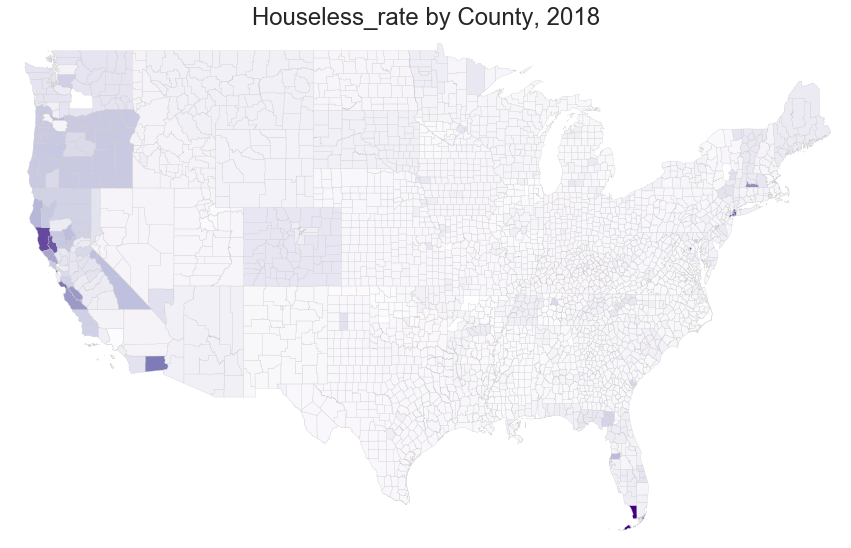

In [35]:
col = 'Houseless_rate'
year = '2018'
ax = geo_df.plot(column=col,figsize=(15,15),cmap='Purples', linewidth=0.3, edgecolor='0.8');
ax.set(xlim=(-126, -66), ylim=(24, 50));
ax.axis('off');
plt.title(label=col+' by county, '+year,fontsize=24);

In [29]:
# column = 'TOT_POP'
# fig, ax = plt.subplots(figsize = (55,40))
# vmin = geo_df[column].min()
# vmax = geo_df[column].max()
# geo_df.plot(ax=ax,column = column,cmap='Purples',legend = False)
# ax.set_title("NYC Population Distribution", fontdict={'fontsize': 70}, loc='center')
# ax.annotate("Population in NYC by Zip Code", xy=(0.25, .1), size=50, xycoords='figure fraction')
# plt.xticks([], [])
# plt.yticks([], [])
# cax = fig.add_axes([.85, 0.28, 0.02, 0.5])
# sm = plt.cm.ScalarMappable(cmap='Purples', norm=plt.Normalize(vmin=vmin, vmax=vmax))
# sm._A = []
# cbr = fig.colorbar(sm, cax=cax)
# cbr.set_label('Number of People', size=30)
# cbr.ax.tick_params(labelsize=40) 
# ax.set_axis_off()
# plt.savefig('population.png',format = 'png',bbox_inches='tight')

# Analysis Question 1: How have these features changed over time?

# Analysis Question 2: Which geographic areas have the highest rates of unemployment, houselessness, food insecurity?

# How does food insecurity rate relate to each of the other features?